In [24]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
def make_var_df(input_csv):
    tpm_df = pd.read_csv(input_csv, index_col=0)
    coef_var = np.log10((tpm_df.std(axis=1)/tpm_df.mean(axis=1))**2)
    means = np.log10(tpm_df.mean(axis=1))
    result = stats.linregress(means, coef_var)
    slope = result[0]
    y_int = result[1]
    var_df = pd.DataFrame([coef_var, means]).T
    var_df.rename(columns = {0:'coef_var',1:'mean'}, inplace=True)
    var_df['expected'] = var_df['mean']*slope + y_int
    
    return var_df

In [26]:
tpm_input_file = "/home/ucsd-train13/scratch/projects/organoids/results/processed_files/tpm_800genes_5882cells.csv"
#specify input file
save_dir = "/home/ucsd-train13/scratch/projects/organoids/results/processed_files/"
#specify save directory

In [27]:
tpm = pd.read_csv(tpm_input_file, index_col=0)
#load matrix
print(tpm.shape)
tpm.head()

(12213, 5882)


,FBWT2_CAGGCATCTCCG,FBWT2_TCACCAGTCTCG,FBWT2_CCCGAGTCATAC,FBWT2_CGCTTACGTCTT,FBWT2_TTCCATATAGCT,FBWT2_TCCCGACCATAA,FBWT2_TAGTGATTATCA,FBWT2_GCCTCCATCGTT,FBWT2_GTACGATCAAGC,FBWT2_TAAACGTCACGG,...,FBIVS2_CGTTCGAGACCC,FBIVS2_ATACGCTCCCCA,FBIVS2_AGTGGTTTGTGG,FBIVS2_TTCGGACCGGTC,FBIVS2_AATGCGGCAGTA,FBIVS2_TATAGTATAAAG,FBIVS2_CAACAGGGTTCG,FBIVS2_ACGGGTAGTCTA,FBIVS2_GGGCGCGGTCTG,FBIVS2_AGGCATTATCCT
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,0.0,0.000000,0.000000,0.743716,1.107481,1.112718,0.718133,0.000000,0.803536,...,0.0,0.0,0.00000,0.0,0.0,8.96861,0.0,0.0,0.0,8.826125
A1BG-AS1,0.000000,0.0,0.000000,0.681338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
AAAS,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.767224,0.000000,...,0.0,0.0,9.23361,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
AACS,0.000000,0.0,0.720357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.803536,...,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,8.826125
AADAT,0.797194,0.0,0.720357,2.044014,0.743716,0.553741,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000


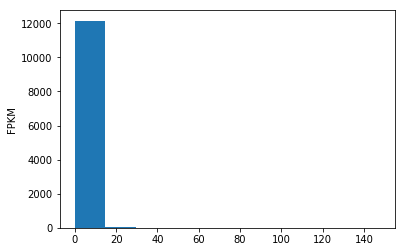

In [28]:
#show expample of 1 cell
plt.hist(tpm['FBWT2_CAGGCATCTCCG'])
plt.ylabel("FPKM")
plt.show()

In [29]:
sd = tpm.std(axis=1)
mean_expr = tpm.mean(axis=1)
coef_var = np.log10((sd/mean_expr)**2)

In [30]:
#calculate means of expression for all genes
means = np.log10(mean_expr)

In [31]:
reg_result = stats.linregress(means, coef_var)
reg_result

LinregressResult(slope=-0.9394536847456978, intercept=0.7057462773885028, rvalue=-0.9855615922995867, pvalue=0.0, stderr=0.00146055299692019)

In [32]:
slope = reg_result[0]
yint = reg_result[1]

In [33]:
var_df = pd.DataFrame([coef_var, means]).T
var_df.rename(columns = {0:"coef_var", 1:"mean"}, inplace=True)
var_df.head()

,coef_var,mean
GENE,,
A1BG,0.893376,-0.257315
A1BG-AS1,1.934407,-1.363984
AAAS,1.172281,-0.559040
AACS,1.419709,-0.819281
AADAT,1.153553,-0.531810


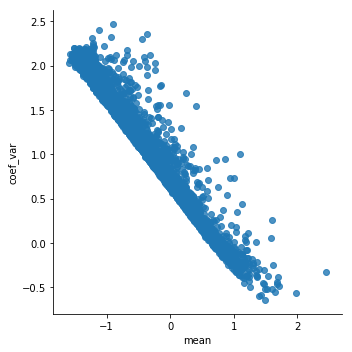

In [34]:
sns.lmplot('mean', 'coef_var', var_df, fit_reg=False)

In [35]:
var_df['expected'] = var_df['mean']*slope + yint
var_df = make_var_df(tpm_input_file)

In [36]:
var_df['sig'] = (var_df['coef_var'] - var_df['expected']) > 0.02
var_df.head()

,coef_var,mean,expected,sig
GENE,,,,
A1BG,0.893376,-0.257315,0.947482,False
A1BG-AS1,1.934407,-1.363984,1.987146,False
AAAS,1.172281,-0.559040,1.230938,False
AACS,1.419709,-0.819281,1.475423,False
AADAT,1.153553,-0.531810,1.205357,False


In [37]:
var_df['sig'].sum()

2827

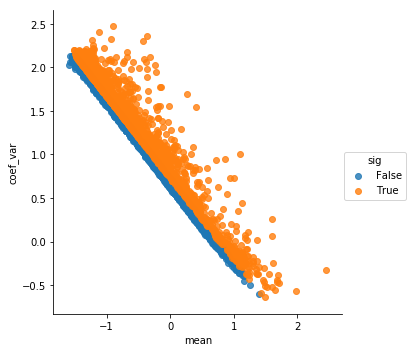

In [38]:
sns.lmplot('mean', 'coef_var', var_df, hue='sig', fit_reg=False)
#plt.savefig("/path/to/save/pict/.tif")

In [39]:
#subset dataframe to keep only variable genes
tpm_var_genes = tpm.loc[var_df['sig']]
print(tpm_var_genes.shape)
tpm_var_genes.head()

(2827, 5882)


,FBWT2_CAGGCATCTCCG,FBWT2_TCACCAGTCTCG,FBWT2_CCCGAGTCATAC,FBWT2_CGCTTACGTCTT,FBWT2_TTCCATATAGCT,FBWT2_TCCCGACCATAA,FBWT2_TAGTGATTATCA,FBWT2_GCCTCCATCGTT,FBWT2_GTACGATCAAGC,FBWT2_TAAACGTCACGG,...,FBIVS2_CGTTCGAGACCC,FBIVS2_ATACGCTCCCCA,FBIVS2_AGTGGTTTGTGG,FBIVS2_TTCGGACCGGTC,FBIVS2_AATGCGGCAGTA,FBIVS2_TATAGTATAAAG,FBIVS2_CAACAGGGTTCG,FBIVS2_ACGGGTAGTCTA,FBIVS2_GGGCGCGGTCTG,FBIVS2_AGGCATTATCCT
GENE,,,,,,,,,,,,,,,,,,,,,
AAED1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AARS2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AASS,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCA1,0.0,0.0,0.0,0.681338,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCC4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
tpm_var_genes.to_csv(save_dir+"tpm_all_vg_0.02.csv")